In [10]:
import numpy as np
import pandas as pd
import sys
sys.path.insert(1, '../../utils/')
import src_utils
import matplotlib.pyplot as plt
from matplotlib.colors import DivergingNorm


# 1. Read in variant index

In [3]:
envision_diffsel = pd.read_csv('../../utils/diffsel.csv', index_col=0)
envision_diffsel

,raw_diffsel,envision_scaled_diffsel
_sy,-0.009982,0.053966
_wt,0.000000,0.053951
A296R,0.400707,0.045005
A296N,0.886004,0.311100
A296D,0.443924,0.053428
...,...,...
V478K,0.441207,0.065404
V478M,-0.071929,-0.089408
V478S,-0.016542,-0.083548
V478T,-0.184293,0.083874


# 2. Convert to heatmap

In [6]:
src_utils.create_heatmap_arr?

Signature: src_utils.create_heatmap_arr(scores, variant_index)
Docstring:
Create heatmap from given scores.

Args:
    scores: scores in order of variant_index (np array)
    variant_index: order of variants in the format 
                    [1 letter WTAA][position][1 letter MutAA] (list)
Returns:
    heatmap_arr: 2D array where positions=rows, aas=cols
File:      ~/fowler/src/utils/src_utils.py
Type:      function


In [8]:
variant_index = src_utils.create_variant_index(envision_diffsel)
envision_diffsel_heatmap = src_utils.create_heatmap_arr(
    envision_diffsel['envision_scaled_diffsel'].values,
    variant_index
)

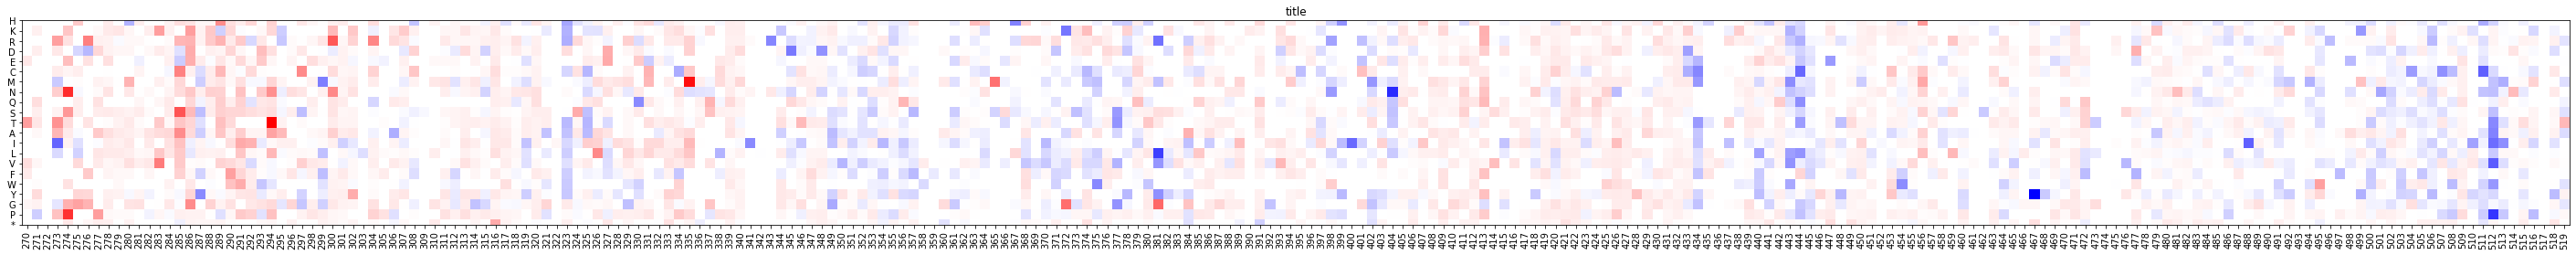

In [14]:
heatmap = envision_diffsel_heatmap
fig, ax = plt.subplots(figsize=(50,300))
resid_map = plt.imshow(heatmap.T, cmap='bwr', norm=DivergingNorm(0.0))

# Set tick locations
ax.set_yticks(np.arange(heatmap.shape[1]))
ax.set_xticks(np.arange(heatmap.shape[0]))

# Set tick labels
ax.set_yticklabels(src_utils.__aa_idx_dict__.keys())
ax.set_xticklabels(src_utils.__pos_idx_dict__.keys())
plt.xticks(rotation='vertical')

# Set title
plt.title('title')

# Show figure
plt.show()